Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [1]:
import pandas as pd 
import numpy as np

In [2]:
cyl_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_cyl.csv?raw=true', compression=None)
hook_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_hook.csv?raw=true', compression=None)
lat_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_lat.csv?raw=true', compression=None)
palm_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_palm.csv?raw=true', compression=None)
spher_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_spher.csv?raw=true', compression=None)
tip_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_tip.csv?raw=true', compression=None)

In [ ]:
cyl_01 = cyl_00.drop(cyl_00.columns[0], axis=1)
hook_01 = hook_00.drop(hook_00.columns[0], axis=1)
lat_01 = lat_00.drop(lat_00.columns[0], axis=1)
palm_01 = palm_00.drop(palm_00.columns[0], axis=1)
spher_01 = spher_00.drop(spher_00.columns[0], axis=1)
tip_01 = tip_00.drop(tip_00.columns[0], axis=1)

In [ ]:
cyl = np.array_split(cyl_01, 30, axis=1)
hook = np.array_split(hook_01, 30, axis=1)
lat = np.array_split(lat_01, 30, axis=1)
palm = np.array_split(palm_01, 30, axis=1)
spher = np.array_split(spher_01, 30, axis=1)
tip = np.array_split(tip_01, 30, axis=1)

In [ ]:
def concatDf (df):
  aux_df = pd.DataFrame(columns = df[0].columns)

  for i in range (30):
  
    a = df[i].T.reset_index(drop=True).T
    aux_df = pd.concat([aux_df,a])

  aux_df_2 = aux_df.reset_index(drop=True)

  return aux_df_2

In [ ]:
cyl_DA = concatDf (cyl)
hook_DA = concatDf(hook)
lat_DA = concatDf(lat)
palm_DA = concatDf(palm)
spher_DA = concatDf(spher)
tip_DA = concatDf(tip)

Definição da matriz de entrada *x*

In [ ]:
x = pd.concat([cyl_DA,hook_DA,lat_DA,palm_DA,spher_DA,tip_DA], ignore_index=True)
x = x.dropna(axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(27000, 100, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((4500,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
y = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
treinoX, testeX, treinoY, testeY = train_test_split(x, y, test_size=0.15, random_state=42)

K-Fold - CNN 1D

In [ ]:
 import tensorflow as tf
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten
from sklearn.model_selection import KFold

In [ ]:
num_classes = 6
model = keras.models.Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(treinoX.shape[1], treinoX.shape[2])))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
#model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
kf = KFold(n_splits = 100)

In [ ]:
x2 = treinoX
y2 = treinoY
kf.get_n_splits(x2)

100

In [ ]:
i = 0
for train_index, test_index in kf.split(x2): 
  X_train, X_test = x2[train_index], x2[test_index]
  y_train, y_test = y2[train_index], y2[test_index]
  
  # fit model
  model.fit(X_train, y_train, batch_size=16, epochs=10) 
  print('Interação: ', i)
  i = i+1

Epoch 1/10
1420/1420 [==============================] - 12s 8ms/step - loss: 1.4392 - accuracy: 0.3691
Epoch 2/10
1420/1420 [==============================] - 11s 8ms/step - loss: 1.3482 - accuracy: 0.4266
Epoch 3/10
1420/1420 [==============================] - 12s 8ms/step - loss: 1.3065 - accuracy: 0.4411
Epoch 4/10
1420/1420 [==============================] - 12s 8ms/step - loss: 1.2750 - accuracy: 0.4578
Epoch 5/10
1420/1420 [==============================] - 12s 8ms/step - loss: 1.2522 - accuracy: 0.4684
Epoch 6/10
1420/1420 [==============================] - 12s 8ms/step - loss: 1.2261 - accuracy: 0.4787
Epoch 7/10
1420/1420 [==============================] - 12s 9ms/step - loss: 1.2117 - accuracy: 0.4895
Epoch 8/10
1420/1420 [==============================] - 12s 9ms/step - loss: 1.1922 - accuracy: 0.4977
Epoch 9/10
1420/1420 [==============================] - 13s 9ms/step - loss: 1.1768 - accuracy: 0.5070
Epoch 10/10
1420/1420 [==============================] - 13s 9ms/step - l

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(testeX)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(testeY, y_pred)
print(cm)

[[260 129  22  95  91  68]
 [105 333  44  45 129  16]
 [ 28  34 293 158   4 215]
 [ 48  62  77 291  44 116]
 [ 94 141  17  26 379  18]
 [ 38  47 129 129   7 318]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.39097744, 0.49553571, 0.40027322, 0.45611285, 0.56148148,
       0.4760479 ])

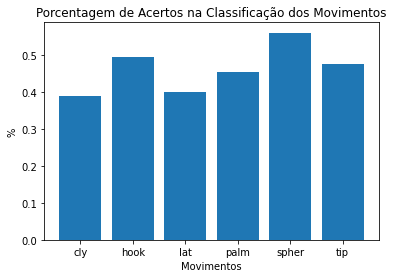

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.05787309322892477

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 11.2 MB 11.0 MB/s 
     |████████████████████████████████| 156 kB 35.1 MB/s 
     |████████████████████████████████| 191 kB 53.0 MB/s 
     |████████████████████████████████| 11.3 MB 21.4 MB/s 
     |████████████████████████████████| 15.7 MB 758 kB/s 
     |████████████████████████████████| 103 kB 56.4 MB/s 
     |████████████████████████████████| 843 kB 54.8 MB/s 
     |████████████████████████████████| 41 kB 570 kB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 890 kB 53.3 MB/s 
     |████████████████████████████████| 98 kB 7.7 MB/s 
     |████████████████████████████████| 6.5 MB 45.3 MB/s 
     |████████████████████████████████| 596 kB 53.9 MB/s 
     |████████████████████████████████| 461 kB 57.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalle

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

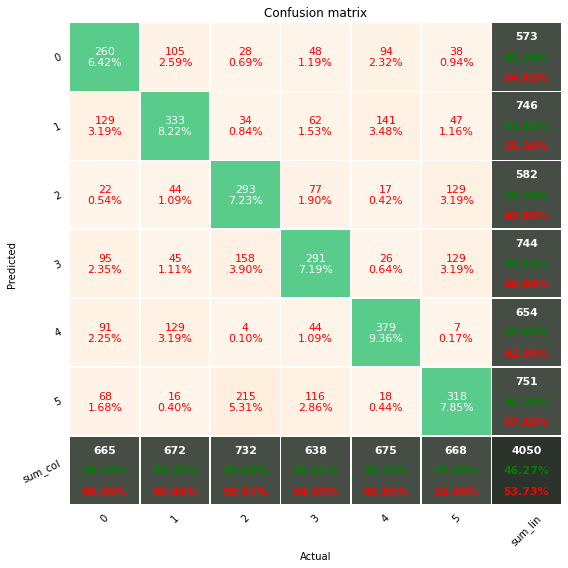

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)